<a href="https://colab.research.google.com/github/Stacy067/Data-Analysis-for-Python/blob/main/3_1_ETF_%EB%AA%A9%EB%A1%9D_%EC%88%98%EC%A7%91_output_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ETF란?
* ETF(상장지수펀드)는 기초지수의 성과를 추적하는 것이 목표인 인덱스펀드로, 거래소에 상장되어 있어서 개별주식과 마찬가지로 기존의 주식계좌를 통해 거래를 할 수 있습니다. 그 구성종목과 수량 등 자산구성내역(PDF)이 투명하게 공개되어 있고, 장중에는 실시간으로 순자산가치(NAV)가 제공되어 거래에 참고하실 수 있습니다. ETF는 1좌를 거래할 수 있는 최소한의 금액만으로 분산투자 효과를 누릴 수 있어 효율적인 투자수단이며, 펀드보다 운용보수가 낮고 주식에 적용되는 거래세도 붙지 않습니다. 
    * 출처 : [ETF : 네이버 금융](https://finance.naver.com/sise/etf.nhn)


## 크롬 브라우저의 네트워크 정보를 통한 데이터 수집
* json 데이터 수집과 파일저장 방법

* [ETF : 네이버 금융](https://finance.naver.com/sise/etf.nhn)



In [ ]:
# 라이브러리를 불러옵니다.
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, http 요청을 위한 requests를 받아옵니다.
import pandas as pd
import numpy as np

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

In [ ]:
# 수집할 url을 가져옵니다.
url = "https://finance.naver.com/api/sise/etfItemList.nhn?etfType=0&targetColumn=market_sum&sortOrder=desc"
url

'https://finance.naver.com/api/sise/etfItemList.nhn?etfType=0&targetColumn=market_sum&sortOrder=desc'

## Pandas를 통한 요청

In [ ]:
pd.read_html(url)

[]

## JSON 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/JSON_vector_logo.svg/300px-JSON_vector_logo.svg.png" width="100">

JSON(제이슨, JavaScript Object Notation)은 속성-값 쌍( attribute–value pairs and array data types (or any other serializable value)) 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷이다. 비동기 브라우저/서버 통신 (AJAX)을 위해, 넓게는 XML(AJAX가 사용)을 대체하는 주요 데이터 포맷이다. 특히, 인터넷에서 자료를 주고 받을 때 그 자료를 표현하는 방법으로 알려져 있다. 자료의 종류에 큰 제한은 없으며, 특히 컴퓨터 프로그램의 변수값을 표현하는 데 적합하다.
본래는 자바스크립트 언어로부터 파생되어 자바스크립트의 구문 형식을 따르지만 언어 독립형 데이터 포맷이다. 즉, 프로그래밍 언어나 플랫폼에 독립적이므로, 구문 분석 및 JSON 데이터 생성을 위한 코드는 C, C++, C#, 자바, 자바스크립트, 펄, 파이썬 등 수많은 프로그래밍 언어에서 쉽게 이용할 수 있다.

* 출처 : [JSON - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/JSON)

## requests를 통한 HTTP 요청
* [Requests: HTTP for Humans™ — Requests documentation](https://requests.readthedocs.io/en/master/)

In [ ]:
# requests 라이브러리를 통해 url을 받아옵니다.
response = requests.get(url)
response

<Response [200]>

In [ ]:
response.text

'{"resultCode":"success","result":{"etfItemList":[{"itemcode":"069500","etfTabCode":1,"itemname":"KODEX 200","nowVal":30895,"risefall":"2","changeVal":185,"changeRate":0.6,"nav":30958.0,"threeMonthEarnRate":-14.0234,"quant":4656347,"amonut":142798,"marketSum":51780},{"itemcode":"371460","etfTabCode":4,"itemname":"TIGER 차이나전기차SOLACTIVE","nowVal":17485,"risefall":"2","changeVal":130,"changeRate":0.75,"nav":17426.0,"threeMonthEarnRate":30.0487,"quant":9177362,"amonut":162330,"marketSum":39222},{"itemcode":"122630","etfTabCode":3,"itemname":"KODEX 레버리지","nowVal":14295,"risefall":"2","changeVal":190,"changeRate":1.35,"nav":14335.0,"threeMonthEarnRate":-27.4621,"quant":47812806,"amonut":673712,"marketSum":23537},{"itemcode":"133690","etfTabCode":4,"itemname":"TIGER 미국나스닥100","nowVal":70025,"risefall":"2","changeVal":1385,"changeRate":2.02,"nav":69884.0,"threeMonthEarnRate":-12.2363,"quant":132532,"amonut":9273,"marketSum":20713},{"itemcode":"252670","etfTabCode":3,"itemname":"KODEX 200선물인버스2

### JSON 타입으로 데이터 받기

In [ ]:
# url = "https://finance.naver.com/api/sise/etfItemList.nhn?etfType=0&targetColumn=market_sum&sortOrder=desc"
# response = requests.get(url)
# etf_json = response.json()

In [ ]:
# requests 의 응답을 json 타입으로 받습니다.
etf_json = response.json()

### JSON 에서 원하는 데이터 찾기

In [ ]:
# result > etfItemList 의 하위 구조로 목록을 찾고자 하는 데이터를 가져옵니다.
etfItemList = etf_json['result']['etfItemList']
etfItemList[0]

## 데이터프레임 변환
### JSON 데이터를 pandas 의 데이터프레임 형태로 만들기

In [ ]:
# 키-값 형태의 데이터를 데이터프레임으로 만듭니다.
df = pd.DataFrame(etfItemList)
df

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
0,069500,1,KODEX 200,30895,2,185,0.60,30958.0,-14.0234,4656347,142798,51780
1,371460,4,TIGER 차이나전기차SOLACTIVE,17485,2,130,0.75,17426.0,30.0487,9177362,162330,39222
2,122630,3,KODEX 레버리지,14295,2,190,1.35,14335.0,-27.4621,47812806,673712,23537
3,133690,4,TIGER 미국나스닥100,70025,2,1385,2.02,69884.0,-12.2363,132532,9273,20713
4,252670,3,KODEX 200선물인버스2X,3305,5,-40,-1.20,3315.0,31.6929,298231327,1000885,20653
...,...,...,...,...,...,...,...,...,...,...,...,...
588,252720,2,KBSTAR 모멘텀밸류,11570,5,-80,-0.69,11626.0,-16.7798,23,0,12
589,284990,2,KBSTAR 200에너지화학,9620,5,-195,-1.99,9644.0,-12.5067,70,0,10
590,287330,2,KBSTAR 200생활소비재,6540,5,-60,-0.91,6553.0,-8.3843,59,0,9
591,287320,2,KBSTAR 200산업재,10555,5,-155,-1.45,10586.0,-9.0832,5,0,8


### 데이터 확인

In [ ]:
# 데이터 프레임으로 잘 만들어 졌는지 상단 데이터의 일부만 미리보기 합니다.
df.head()

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
0,069500,1,KODEX 200,30895,2,185,0.60,30958.0,-14.0234,4656347,142798,51780
1,371460,4,TIGER 차이나전기차SOLACTIVE,17485,2,130,0.75,17426.0,30.0487,9177362,162330,39222
2,122630,3,KODEX 레버리지,14295,2,190,1.35,14335.0,-27.4621,47812806,673712,23537
3,133690,4,TIGER 미국나스닥100,70025,2,1385,2.02,69884.0,-12.2363,132532,9273,20713
4,252670,3,KODEX 200선물인버스2X,3305,5,-40,-1.20,3315.0,31.6929,298231327,1000885,20653


In [ ]:
# 데이터 프레임으로 잘 만들어 졌는지 하단 데이터의 일부만 미리보기 합니다.
df.tail()

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
588,252720,2,KBSTAR 모멘텀밸류,11570,5,-80,-0.69,11626.0,-16.7798,23,0,12
589,284990,2,KBSTAR 200에너지화학,9620,5,-195,-1.99,9644.0,-12.5067,70,0,10
590,287330,2,KBSTAR 200생활소비재,6540,5,-60,-0.91,6553.0,-8.3843,59,0,9
591,287320,2,KBSTAR 200산업재,10555,5,-155,-1.45,10586.0,-9.0832,5,0,8
592,287310,2,KBSTAR 200경기소비재,9345,2,5,0.05,9366.0,-4.3425,6,0,7


In [ ]:
# 기술통계 보기
# round 소숫점 자릿수
df.describe().round(3)

,etfTabCode,nowVal,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
count,593.000,593.000,593.000,593.000,593.000,551.000,5.930000e+02,593.000,593.000
mean,3.393,18727.285,28.575,0.015,18722.337,-9.742,9.371346e+05,6390.725,1243.275
std,1.828,23935.372,173.656,1.196,23934.810,11.700,1.280723e+07,54498.249,3882.492
min,1.000,2235.000,-420.000,-3.530,511.000,-40.084,0.000000e+00,0.000,7.000
25%,2.000,8220.000,-65.000,-0.730,8210.000,-16.104,1.550000e+02,2.000,75.000
50%,3.000,10395.000,0.000,0.000,10439.000,-12.930,3.232000e+03,37.000,157.000
75%,4.000,14415.000,95.000,0.620,14444.000,-1.314,2.752000e+04,311.000,637.000
max,7.000,111675.000,1385.000,7.370,111609.000,41.115,2.982313e+08,1000885.000,51780.000


In [ ]:
df.describe(include="object")

,itemcode,itemname,risefall
count,593,593,593
unique,593,593,3
top,069500,KODEX 200,2
freq,1,1,291


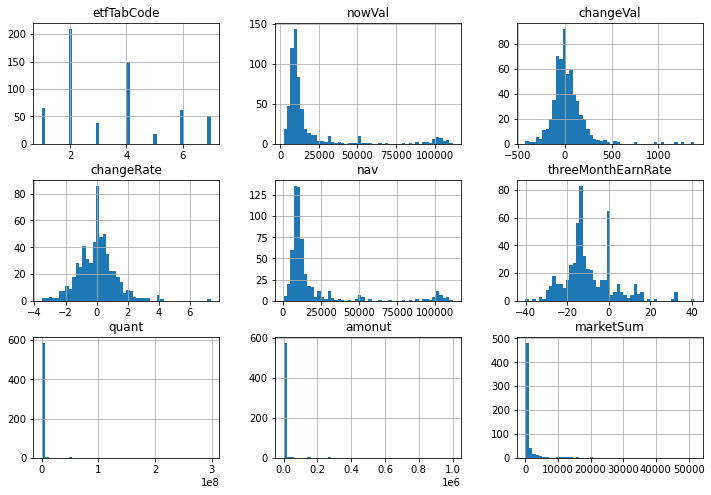

In [ ]:
_ = df.hist(figsize=(12, 8), bins=50)

In [ ]:
df.columns

Index(['itemcode', 'etfTabCode', 'itemname', 'nowVal', 'risefall', 'changeVal',
       'changeRate', 'nav', 'threeMonthEarnRate', 'quant', 'amonut',
       'marketSum'],
      dtype='object')

In [ ]:
tab_name = """전체
국내 시장지수
국내 업종/테마
국내 파생
해외 주식
원자재
채권
기타"""
tab_name_list = tab_name.split("\n")
tab_name_list

['전체', '국내 시장지수', '국내 업종/테마', '국내 파생', '해외 주식', '원자재', '채권', '기타']

In [ ]:
def find_tab_name(tab_code):
    return tab_name_list[tab_code]

find_tab_name(1)

'국내 시장지수'

In [ ]:
df["etfTabName"] = df["etfTabCode"].map(find_tab_name)

In [ ]:
df["etfTabName"].value_counts()

국내 업종/테마    210
해외 주식       149
국내 시장지수      66
채권           62
기타           51
국내 파생        37
원자재          18
Name: etfTabName, dtype: int64

## 파일 저장
### 파일명 만들기

In [ ]:
# 파이썬 표준라이브러리인 datetime을 불러옵니다.
# 날짜를 만들어 저장하기 위해 오늘 날짜를 구합니다.
import datetime

today = datetime.datetime.today().strftime("%Y-%m-%d")
today

'2022-07-15'

In [ ]:
# f-string 방식으로 파일명을 만들어 줍니다.
# eft_날짜_raw.csv 형태로 만듭니다.
file_name = f"eft_{today}_raw.csv"
file_name

'eft_2022-07-15_raw.csv'

### 파일로 저장하고 불러오기

In [ ]:
# csv 형태로 저장합니다. index 가 저장되지 않도록 합니다.
# 엑셀에서 한글이 깨지지 않게 하려면 encoding="cp949" 를 지정해 주셔야 합니다.
df.to_csv(file_name, index=False, encoding="cp949")

In [ ]:
# 저장된 csv 파일을 읽어옵니다.
# itemcode 숫자 앞의 0 이 지워진다면 dtype={"itemcode": np.object} 로 타입을 지정해 주면 문자형태로 읽어옵니다.
pd.read_csv(file_name, encoding="cp949", dtype={"itemcode": "object"})

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum,etfTabName
0,069500,1,KODEX 200,30895,2,185,0.60,30958.0,-14.0234,4656347,142798,51780,국내 시장지수
1,371460,4,TIGER 차이나전기차SOLACTIVE,17485,2,130,0.75,17426.0,30.0487,9177362,162330,39222,해외 주식
2,122630,3,KODEX 레버리지,14295,2,190,1.35,14335.0,-27.4621,47812806,673712,23537,국내 파생
3,133690,4,TIGER 미국나스닥100,70025,2,1385,2.02,69884.0,-12.2363,132532,9273,20713,해외 주식
4,252670,3,KODEX 200선물인버스2X,3305,5,-40,-1.20,3315.0,31.6929,298231327,1000885,20653,국내 파생
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,252720,2,KBSTAR 모멘텀밸류,11570,5,-80,-0.69,11626.0,-16.7798,23,0,12,국내 업종/테마
589,284990,2,KBSTAR 200에너지화학,9620,5,-195,-1.99,9644.0,-12.5067,70,0,10,국내 업종/테마
590,287330,2,KBSTAR 200생활소비재,6540,5,-60,-0.91,6553.0,-8.3843,59,0,9,국내 업종/테마
591,287320,2,KBSTAR 200산업재,10555,5,-155,-1.45,10586.0,-9.0832,5,0,8,국내 업종/테마


In [ ]:
# 탈모관련 테마주

up_url ="https://finance.naver.com/sise/sise_group_detail.naver?type=theme&no=506"

In [ ]:
df_up = pd.read_html(up_url, encoding="cp949")[2]
# axis=0 행 기준, axis=1 열 기준
df_all_up = df_up.dropna(how="all").dropna(how="all", axis=1)
df_all_up

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,프롬바이오 *,테마 편입 사유,9590.0,1100.0,+12.96%,9580.0,9590.0,5238554.0,49697.0,238252.0
2,프로스테믹스 *,테마 편입 사유,2200.0,225.0,+11.39%,2195.0,2200.0,642884.0,1343.0,120966.0
3,강스템바이오텍 *,테마 편입 사유,3075.0,100.0,+3.36%,3070.0,3075.0,140944.0,427.0,51192.0
4,아이엘사이언스 *,테마 편입 사유,3925.0,65.0,+1.68%,3905.0,3925.0,99028.0,386.0,41809.0
5,대웅제약,테마 편입 사유,178500.0,1500.0,+0.85%,178000.0,178500.0,33525.0,6008.0,26694.0
6,바이오니아 *,테마 편입 사유,36850.0,250.0,+0.68%,36850.0,36900.0,2362566.0,90010.0,1096311.0
7,에스디생명공학 *,테마 편입 사유,2050.0,10.0,+0.49%,2050.0,2055.0,87872.0,179.0,59820.0
8,JW신약 *,테마 편입 사유,4075.0,0.0,0.00%,4075.0,4090.0,324732.0,1312.0,1061545.0
9,인스코비,테마 편입 사유,2180.0,5.0,-0.23%,2180.0,2190.0,2088213.0,4696.0,380101.0
10,인산가 *,테마 편입 사유,1990.0,5.0,-0.25%,1985.0,1990.0,61437.0,121.0,37824.0


In [ ]:
df_all_up["종목명"] = df_all_up["종목명"].str.replace("*", "").str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing("KRX")
df_krx = df_krx[["Symbol", "Name"]]
df_krx.head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [ ]:
df_all_up.merge(df_krx, left_on="종목명", right_on="Name")

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,Symbol,Name
0,프롬바이오,테마 편입 사유,9590.0,1100.0,+12.96%,9580.0,9590.0,5238554.0,49697.0,238252.0,377220,프롬바이오
1,프로스테믹스,테마 편입 사유,2200.0,225.0,+11.39%,2195.0,2200.0,642884.0,1343.0,120966.0,203690,프로스테믹스
2,강스템바이오텍,테마 편입 사유,3075.0,100.0,+3.36%,3070.0,3075.0,140944.0,427.0,51192.0,217730,강스템바이오텍
3,아이엘사이언스,테마 편입 사유,3925.0,65.0,+1.68%,3905.0,3925.0,99028.0,386.0,41809.0,307180,아이엘사이언스
4,대웅제약,테마 편입 사유,178500.0,1500.0,+0.85%,178000.0,178500.0,33525.0,6008.0,26694.0,069620,대웅제약
5,바이오니아,테마 편입 사유,36850.0,250.0,+0.68%,36850.0,36900.0,2362566.0,90010.0,1096311.0,064550,바이오니아
6,에스디생명공학,테마 편입 사유,2050.0,10.0,+0.49%,2050.0,2055.0,87872.0,179.0,59820.0,217480,에스디생명공학
7,JW신약,테마 편입 사유,4075.0,0.0,0.00%,4075.0,4090.0,324732.0,1312.0,1061545.0,067290,JW신약
8,인스코비,테마 편입 사유,2180.0,5.0,-0.23%,2180.0,2190.0,2088213.0,4696.0,380101.0,006490,인스코비
9,인산가,테마 편입 사유,1990.0,5.0,-0.25%,1985.0,1990.0,61437.0,121.0,37824.0,277410,인산가
